In [1]:
%matplotlib inline
import numpy as np
import math
import random
import pyJHTDB
import matplotlib.pyplot as plt

N = 10
T = pyJHTDB.dbinfo.channel['time'][-1]
time = np.random.random()*T

spatialInterp  = 6  # 6 point Lagrange
temporalInterp = 0  # no time interpolation
FD4Lag4        = 40 # 4 point Lagrange interp for derivatives

# mhdc has starttime .364 and endtime .376
startTime = time
endTime = startTime + 0.012
lag_dt = 0.0004

# Select points in the database to query
lpoints = []
for i in range(0,10):
    lpoints.append([random.uniform(0, 8*3.14),random.uniform(-1, 1),random.uniform(0, 3*3.14)])

# 2D array with single precision values
points = np.array(lpoints,dtype='float32')

/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# load shared library
lTDB = pyJHTDB.libJHTDB()
#initialize webservices
lTDB.initialize()

#Add token
auth_token  = "edu.jhu.pha.turbulence.testing-201311"
lTDB.add_token(auth_token)

print('Coordinates of {0} points where variables are requested:'.format(N))
for p in range(N):
    print('{0}: {1}'.format(p, points[p]))
print('Data is requested at time {0}'.format(time))

Coordinates of 10 points where variables are requested:
0: [14.156776    0.19389226  2.2181165 ]
1: [21.55385    0.5061248  2.2091353]
2: [24.603731   -0.24974263  2.975846  ]
3: [24.262285  -0.3327233  2.3095622]
4: [9.3663225 0.532585  5.004885 ]
5: [18.902264   -0.48211563  5.010908  ]
6: [ 2.1709984e+01 -4.3825531e-01  1.7662149e-02]
7: [ 6.536318  -0.0803171  8.452215 ]
8: [22.986849   0.2310335  9.1101885]
9: [14.367111   0.3856345  4.0896597]
Data is requested at time 0.758448516359


In [3]:
print('Requesting velocity at {0} points...'.format(N))
result = lTDB.getData(time, points,data_set = 'channel',
        sinterp = spatialInterp, tinterp = temporalInterp,
        getFunction = 'getVelocity')
for p in range(N):
    print('{0}: {1}'.format(p, result[p]))

Requesting velocity at 10 points...
0: [ 1.1485865   0.01670677 -0.03755548]
1: [ 1.0858896   0.0124375  -0.04492276]
2: [ 1.1777683  -0.01879335  0.00532694]
3: [ 0.9523397   0.02554707 -0.00365441]
4: [ 1.058574   -0.01796236  0.02431555]
5: [ 0.97785467 -0.00119088  0.10470736]
6: [ 1.0983788  -0.05500704  0.02317658]
7: [1.114672   0.02588973 0.00145851]
8: [1.1190385  0.05673377 0.00829488]
9: [ 1.0826821   0.00321981 -0.02050699]


In [4]:
print('Requesting pressure at {0} points...'.format(N))
result = lTDB.getData(time, points,data_set = 'channel',
        sinterp = spatialInterp, tinterp = temporalInterp,
        getFunction = 'getPressure')
for p in range(N):
    print('{0}: {1}'.format(p, result[p]))

Requesting pressure at 10 points...
0: [-0.00248077]
1: [0.00120152]
2: [-0.00051066]
3: [-0.00077559]
4: [0.00410948]
5: [-0.01140625]
6: [0.00269507]
7: [-0.00065827]
8: [0.00188346]
9: [-0.0007172]


In [5]:
print('Requesting velocity and pressure at {0} points...'.format(N))
result = lTDB.getData(time, points,data_set = 'channel',
        sinterp = spatialInterp, tinterp = temporalInterp,
        getFunction = 'getVelocityAndPressure')
for p in range(N):
    print('{0}: {1}'.format(p, result[p]))

Requesting velocity and pressure at 10 points...
0: [ 1.1485865   0.01670677 -0.03755548 -0.00248077]
1: [ 1.0858896   0.0124375  -0.04492276  0.00120152]
2: [ 1.1777683e+00 -1.8793352e-02  5.3269439e-03 -5.1065820e-04]
3: [ 9.5233971e-01  2.5547070e-02 -3.6544097e-03 -7.7558908e-04]
4: [ 1.058574   -0.01796236  0.02431555  0.00410948]
5: [ 0.97785467 -0.00119088  0.10470736 -0.01140625]
6: [ 1.0983788  -0.05500704  0.02317658  0.00269507]
7: [ 1.1146719e+00  2.5889726e-02  1.4585119e-03 -6.5827463e-04]
8: [1.1190385  0.05673377 0.00829488 0.00188346]
9: [ 1.0826821e+00  3.2198105e-03 -2.0506985e-02 -7.1719504e-04]


In [8]:
print('Requesting velocity gradient at {0} points...'.format(N))
result = lTDB.getData(time, points,
        sinterp = FD4Lag4, tinterp = temporalInterp,data_set ='channel',
        getFunction = 'getVelocityGradient')
for p in range(N):
    print('{0}: '.format(p) +
          'duxdx = {0:+e}, duxdy = {1:+e}, duxdz = {2:+e}\n   '.format(result[p][0], result[p][1], result[p][2]) +
          'duydx = {0:+e}, duydy = {1:+e}, duydz = {2:+e}\n   '.format(result[p][3], result[p][4], result[p][5]) +
          'duzdx = {0:+e}, duzdy = {1:+e}, duzdz = {2:+e}'.format(result[p][6], result[p][7], result[p][8]))

Requesting velocity gradient at 10 points...
0: duxdx = -1.049846e+00, duxdy = -3.786886e-02, duxdz = -1.200721e-01
   duydx = +5.662149e-01, duydy = +7.409105e-01, duydz = -7.264318e-02
   duzdx = -9.639914e-02, duzdy = -3.056504e-02, duzdz = +4.076772e-01
1: duxdx = -1.303131e-01, duxdy = -2.496757e-01, duxdz = +3.976380e-01
   duydx = +3.238866e-01, duydy = -5.733253e-02, duydz = -4.745608e-01
   duzdx = +1.400114e-01, duzdy = +3.257934e-01, duzdz = +1.619780e-01
2: duxdx = +9.848582e-01, duxdy = -8.842705e-01, duxdz = -1.684197e+00
   duydx = -5.516220e-01, duydy = +5.846873e-02, duydz = +1.137415e+00
   duzdx = -2.006409e+00, duzdy = -9.589872e-01, duzdz = -5.828571e-01
3: duxdx = -1.050866e-01, duxdy = +4.421709e-01, duxdz = +3.719460e-01
   duydx = +4.784201e-01, duydy = -6.985839e-02, duydz = +4.508823e-01
   duzdx = -8.425536e-01, duzdy = -1.189498e+00, duzdz = +1.962333e-01
4: duxdx = -7.859668e-01, duxdy = +1.254998e+00, duxdz = +5.918995e-01
   duydx = +3.962517e-01, duydy 

In [6]:
print('Requesting velocity hessian at {0} points...'.format(N))
result = lTDB.getData(time, points,data_set = 'channel',sinterp = FD4Lag4, tinterp = temporalInterp,
                      getFunction = 'getVelocityHessian')

for p in range(N):
        print('{0}: '.format(p) +
              'd2uxdxdx = {0:+e}, d2uxdxdy = {1:+e}, d2uxdxdz = {2:+e}\n   '.format(result[p][ 0], result[p][ 1], result[p][ 2])
            + 'd2uxdydy = {0:+e}, d2uxdydz = {1:+e}, d2uxdzdz = {2:+e}\n   '.format(result[p][ 3], result[p][ 4], result[p][ 5])
            + 'd2uydxdx = {0:+e}, d2uydxdy = {1:+e}, d2uydxdz = {2:+e}\n   '.format(result[p][ 6], result[p][ 7], result[p][ 8])
            + 'd2uydydy = {0:+e}, d2uydydz = {1:+e}, d2uydzdz = {2:+e}\n   '.format(result[p][ 9], result[p][10], result[p][11])
            + 'd2uzdxdx = {0:+e}, d2uzdxdy = {1:+e}, d2uzdxdz = {2:+e}\n   '.format(result[p][12], result[p][13], result[p][14])
            + 'd2uzdydy = {0:+e}, d2uzdydz = {1:+e}, d2uzdzdz = {2:+e}'.format(result[p][15], result[p][16], result[p][17]))
        

Requesting velocity hessian at 10 points...
0: d2uxdxdx = -3.388785e+00, d2uxdxdy = +1.897488e+00, d2uxdxdz = -1.858193e+00
   d2uxdydy = -7.390024e+00, d2uxdydz = -9.150121e-01, d2uxdzdz = +8.669293e+00
   d2uydxdx = -5.915524e+00, d2uydxdy = +3.890810e+00, d2uydxdz = +1.714974e+00
   d2uydydy = -6.742610e+00, d2uydydz = +5.703576e+00, d2uydzdz = -9.278437e+00
   d2uzdxdx = -4.704521e+00, d2uzdxdy = -5.616237e+00, d2uzdxdz = -3.852558e-01
   d2uzdydy = +2.537616e+00, d2uzdydz = +4.622005e+00, d2uzdzdz = -3.784793e+00
1: d2uxdxdx = -1.516843e+01, d2uxdxdy = -7.583230e-01, d2uxdxdz = +1.847420e+01
   d2uxdydy = -1.325077e+01, d2uxdydz = -2.440333e+01, d2uxdzdz = -5.970958e+01
   d2uydxdx = -2.009920e+01, d2uydxdy = +4.070149e+00, d2uydxdz = +2.255388e+01
   d2uydydy = -7.669364e+00, d2uydydz = +5.043972e+00, d2uydzdz = -1.237887e+01
   d2uzdxdx = -1.748652e-01, d2uzdxdy = +2.227307e+00, d2uzdxdz = +1.314801e+00
   d2uzdydy = +1.036404e+01, d2uzdydz = -1.753788e+00, d2uzdzdz = -2.245837e

In [7]:
print('Requesting velocity laplacian at {0} points...'.format(N))
result = lTDB.getData(time, points,
        sinterp = FD4Lag4, tinterp = temporalInterp, data_set = 'channel',
        getFunction = 'getVelocityLaplacian')
for p in range(N):
    print('{0}: '.format(p) +
          'grad2ux = {0:+e}, grad2uy = {1:+e}, grad2uz = {2:+e}, '.format(result[p][0], result[p][1], result[p][2]))

Requesting velocity laplacian at 10 points...
0: grad2ux = -2.109515e+00, grad2uy = -2.193657e+01, grad2uz = -5.951698e+00, 
1: grad2ux = -8.812877e+01, grad2uy = -4.014743e+01, grad2uz = -1.226920e+01, 
2: grad2ux = -1.748816e+01, grad2uy = -2.553846e+01, grad2uz = -1.718364e+01, 
3: grad2ux = -2.549129e+01, grad2uy = -3.678781e+01, grad2uz = -1.998567e+01, 
4: grad2ux = +1.388338e+01, grad2uy = +2.007499e+01, grad2uz = +1.720441e+01, 
5: grad2ux = +4.189001e+02, grad2uy = -9.856398e+01, grad2uz = -5.698736e+01, 
6: grad2ux = -1.426529e+01, grad2uy = +3.334836e+02, grad2uz = +2.090337e+02, 
7: grad2ux = -7.729792e+01, grad2uy = -2.192636e+01, grad2uz = -9.959745e+00, 
8: grad2ux = -8.595437e+01, grad2uy = -6.374838e+01, grad2uz = +2.956731e+01, 
9: grad2ux = -1.063484e+01, grad2uy = -2.740629e+01, grad2uz = +3.396097e+00, 


In [8]:
print('Requesting pressure gradient at {0} points...'.format(N))
result = lTDB.getData(time, points,
        sinterp = FD4Lag4, tinterp = temporalInterp, data_set = 'channel',
        getFunction = 'getPressureGradient')
for p in range(N):
    print('{0}: '.format(p)
        + 'dpdx = {0:+e}, dpdy = {1:+e}, dpdz = {2:+e}, '.format(result[p][0], result[p][1], result[p][2]))

Requesting pressure gradient at 10 points...
0: dpdx = +2.677406e-03, dpdy = -8.320212e-03, dpdz = +2.712562e-03, 
1: dpdx = +2.590174e-02, dpdy = +2.341162e-02, dpdz = +6.920572e-03, 
2: dpdx = -4.190364e-03, dpdy = -4.378428e-03, dpdz = +9.265896e-03, 
3: dpdx = +2.405425e-02, dpdy = +1.898288e-03, dpdz = -5.752961e-03, 
4: dpdx = -1.650970e-02, dpdy = +5.765543e-04, dpdz = -1.765699e-03, 
5: dpdx = -1.828267e-01, dpdy = +1.409680e-01, dpdz = +2.617937e-02, 
6: dpdx = -4.772625e-02, dpdy = -6.476422e-02, dpdz = +2.339813e-02, 
7: dpdx = -2.981992e-03, dpdy = -3.482174e-03, dpdz = +7.326001e-03, 
8: dpdx = +9.314513e-03, dpdy = +9.628602e-04, dpdz = +8.483538e-04, 
9: dpdx = +4.379482e-03, dpdy = +1.133761e-02, dpdz = +9.907570e-03, 


In [9]:
print('Requesting pressure hessian at {0} points...'.format(N))
result = lTDB.getData(time, points,
        sinterp = FD4Lag4, tinterp = temporalInterp, data_set = 'channel',
        getFunction = 'getPressureHessian')
for p in range(N):
    print('{0}: '.format(p) +
          'd2pdxdx = {0:+e}, d2pdxdy = {1:+e}, d2pdxdz = {2:+e}\n   '.format(result[p][0], result[p][1], result[p][2])
        + 'd2pdydy = {0:+e}, d2pdydz = {1:+e}, d2pdzdz = {2:+e}'.format(result[p][3], result[p][4], result[p][5]))

Requesting pressure hessian at 10 points...
0: d2pdxdx = +1.012210e-01, d2pdxdy = -6.948687e-02, d2pdxdz = +2.684251e-02
   d2pdydy = +4.647841e-02, d2pdydz = -7.445113e-02, d2pdzdz = +2.554215e-01
1: d2pdxdx = +3.559870e-01, d2pdxdy = +3.716083e-01, d2pdxdz = -3.707132e-01
   d2pdydy = -6.284006e-02, d2pdydz = -4.042317e-01, d2pdzdz = -9.041156e-01
2: d2pdxdx = +5.492143e-01, d2pdxdy = +1.868228e-01, d2pdxdz = -2.442196e-02
   d2pdydy = -8.483410e-01, d2pdydz = +4.971177e-01, d2pdzdz = +1.833040e-01
3: d2pdxdx = +9.804080e-01, d2pdxdy = +2.796384e-01, d2pdxdz = -7.823011e-02
   d2pdydy = +2.083319e-01, d2pdydz = -2.170486e-01, d2pdzdz = +1.863288e-01
4: d2pdxdx = -4.554797e-01, d2pdxdy = -2.649469e-01, d2pdxdz = -5.228297e-02
   d2pdydy = -1.441348e-01, d2pdydz = -5.825080e-02, d2pdzdz = -9.201712e-02
5: d2pdxdx = -9.054244e+00, d2pdxdy = +2.794711e+00, d2pdxdz = -2.112215e+00
   d2pdydy = -5.791324e-01, d2pdydz = -5.735786e-02, d2pdzdz = -2.292487e-01
6: d2pdxdx = +1.196602e+00, d2pd

In [10]:
result = lTDB.getThreshold(
            data_set = 'channel',
            field = 'vorticity',
            time = 0.1,
            threshold = 0.0,
            cx = 0, cy = 0, cz = 0,
            nx = 4, ny = 4, nz = 4,
            sinterp = 40,
            tinterp = 0)
for p in range(N):
    print('{0}: '.format(p)
        + 'i_x = {0}, i_y = {1}, i_z = {2}, value = {3} '.format(result[p][0], result[p][1], result[p][2],result[p][3]))

0: i_x = 1, i_y = 0, i_z = 2, value = 63.0017166138 
1: i_x = 1, i_y = 1, i_z = 2, value = 62.8125915527 
2: i_x = 1, i_y = 0, i_z = 3, value = 62.5691452026 
3: i_x = 1, i_y = 2, i_z = 2, value = 62.380115509 
4: i_x = 1, i_y = 1, i_z = 3, value = 62.3709487915 
5: i_x = 1, i_y = 2, i_z = 3, value = 61.915222168 
6: i_x = 1, i_y = 3, i_z = 2, value = 61.6644859314 
7: i_x = 0, i_y = 0, i_z = 2, value = 61.2872505188 
8: i_x = 0, i_y = 1, i_z = 2, value = 61.1567687988 
9: i_x = 1, i_y = 3, i_z = 3, value = 61.1527481079 


In [11]:
result = lTDB.getRawData(
            time,
            start = np.array([0, 0, 0], dtype = np.int),
            size  = np.array([8, 8, 8], dtype = np.int),
            data_set = 'channel',
            getFunction = 'Pressure')
print result

[[[[-7.7282046e-03]
   [-9.4790598e-03]
   [-7.7741379e-03]
   [-4.9266922e-03]
   [-1.2337734e-03]
   [ 1.4854729e-04]
   [-1.5546281e-03]
   [-2.9510437e-03]]

  [[-7.7247354e-03]
   [-9.4761522e-03]
   [-7.7718515e-03]
   [-4.9247523e-03]
   [-1.2324475e-03]
   [ 1.4976389e-04]
   [-1.5533966e-03]
   [-2.9499079e-03]]

  [[-7.7167423e-03]
   [-9.4694663e-03]
   [-7.7665732e-03]
   [-4.9202950e-03]
   [-1.2294189e-03]
   [ 1.5252247e-04]
   [-1.5506289e-03]
   [-2.9473475e-03]]

  [[-7.7033280e-03]
   [-9.4582895e-03]
   [-7.7576838e-03]
   [-4.9128532e-03]
   [-1.2244243e-03]
   [ 1.5700547e-04]
   [-1.5462153e-03]
   [-2.9432389e-03]]

  [[-7.6838564e-03]
   [-9.4421683e-03]
   [-7.7447030e-03]
   [-4.9021407e-03]
   [-1.2173827e-03]
   [ 1.6316165e-04]
   [-1.5403682e-03]
   [-2.9377383e-03]]

  [[-7.6580807e-03]
   [-9.4210366e-03]
   [-7.7273548e-03]
   [-4.8881355e-03]
   [-1.2084777e-03]
   [ 1.7059606e-04]
   [-1.5337885e-03]
   [-2.9314463e-03]]

  [[-7.6263081e-03]
   [-9.3

In [ ]:
x, t = lTDB.getPosition(
    starttime = 0.1,
    endtime = 0.2,
    dt = 0.001,
    point_coords = 2*np.pi * np.random.random((20, 3)),
    steps_to_keep = 50)

('starting integration loop, dataset is ', 'isotropic1024coarse')
at time step 1 out of 50
got next position for time step 1
at time step 2 out of 50
got next position for time step 2
at time step 3 out of 50
got next position for time step 3
at time step 4 out of 50
got next position for time step 4
at time step 5 out of 50
got next position for time step 5
at time step 6 out of 50
got next position for time step 6
at time step 7 out of 50
got next position for time step 7
at time step 8 out of 50
got next position for time step 8
at time step 9 out of 50
got next position for time step 9
at time step 10 out of 50
got next position for time step 10
at time step 11 out of 50
got next position for time step 11
at time step 12 out of 50


In [14]:
t = np.linspace(0, 0.2, 64)
x = np.zeros((t.shape[0], t.shape[0], 3), np.float32)
x[:, :, 0] = t[np.newaxis, :]
x[:, :, 1] = t[:, np.newaxis]
x[:, :, 2] = .0

In [16]:
T = pyJHTDB.dbinfo.channel['time'][-1]
time = np.random.random()*T
u = lTDB.getData(
               time,
               x,
               sinterp = 4,
               getFunction='getVelocity')

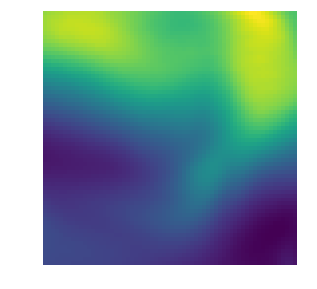

In [17]:
e = np.sum(u**2, axis = 2)
fig = plt.figure(figsize = (10, 5))
a = fig.add_subplot(121)
a.set_axis_off()
a.imshow(e,
         extent = [t[0], t[-1] - t[0], t[0], t[-1] - t[0]],
         interpolation = 'none')

In [18]:
lTDB.finalize()